In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
import pandas_datareader
import datetime



In [4]:
import pandas_datareader.data as web

In [5]:
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2017,1,1)


In [9]:
tesla = web.DataReader('TSLA','yahoo',start,end)
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000


In [10]:
tesla.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-12-23,213.449997,207.710007,208.000000,213.339996,4670500,213.339996
2016-12-27,222.250000,214.419998,214.880005,219.529999,5915700,219.529999
2016-12-28,223.800003,217.199997,221.529999,219.740005,3782500,219.740005
2016-12-29,219.199997,214.119995,218.559998,214.679993,4045000,214.679993
2016-12-30,217.500000,211.679993,216.300003,213.690002,4642600,213.690002


In [11]:
ford = web.DataReader('F','yahoo',start,end)
GM = web.DataReader('GM','yahoo',start,end)


In [12]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.836860
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.956559
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,8.160754
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,8.245250
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,8.308619


In [13]:
GM.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.103352
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.179853
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,16.960161
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.533915
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.472712


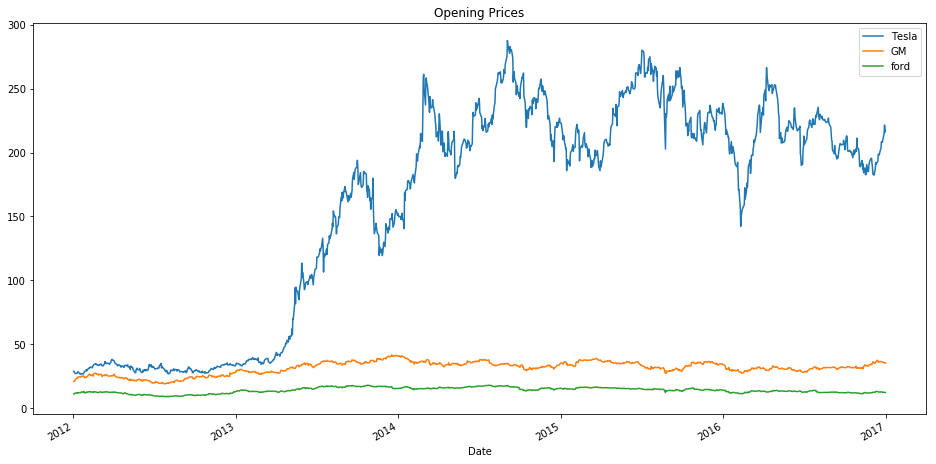

In [15]:
tesla['Open'].plot(label='Tesla',figsize=(16,8),title='Opening Prices')
GM['Open'].plot(label='GM')
ford['Open'].plot(label='ford')
plt.legend()

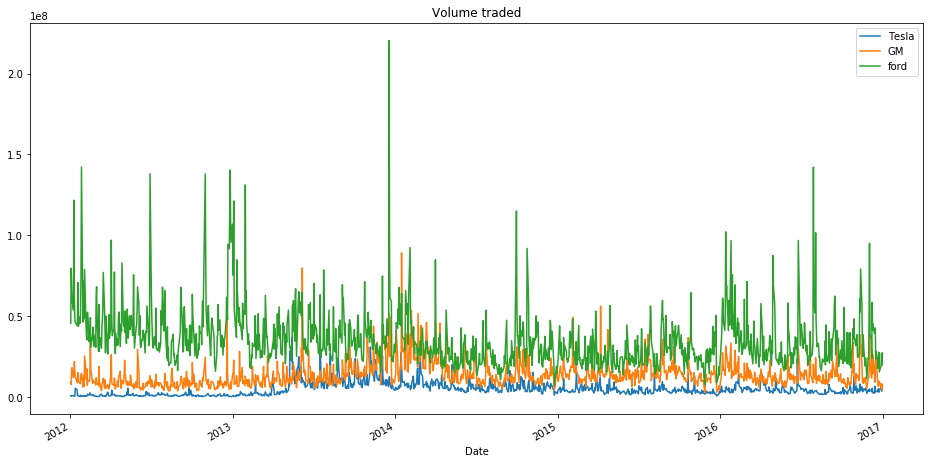

In [16]:
tesla['Volume'].plot(label='Tesla',figsize=(16,8),title='Volume traded')
GM['Volume'].plot(label='GM')
ford['Volume'].plot(label='ford')
plt.legend()

In [18]:
tesla['Volume'].argmax()

C:\Users\shanu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


Timestamp('2013-05-14 00:00:00')

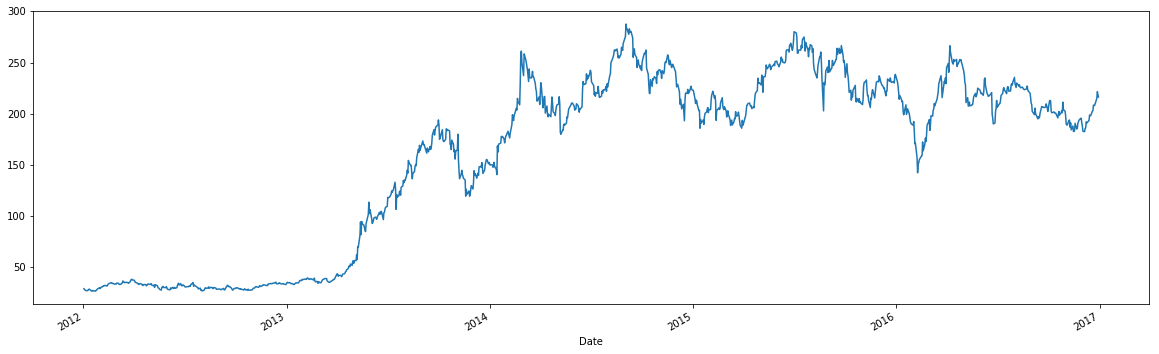

In [21]:
tesla['Open'].plot(figsize=(20,6))

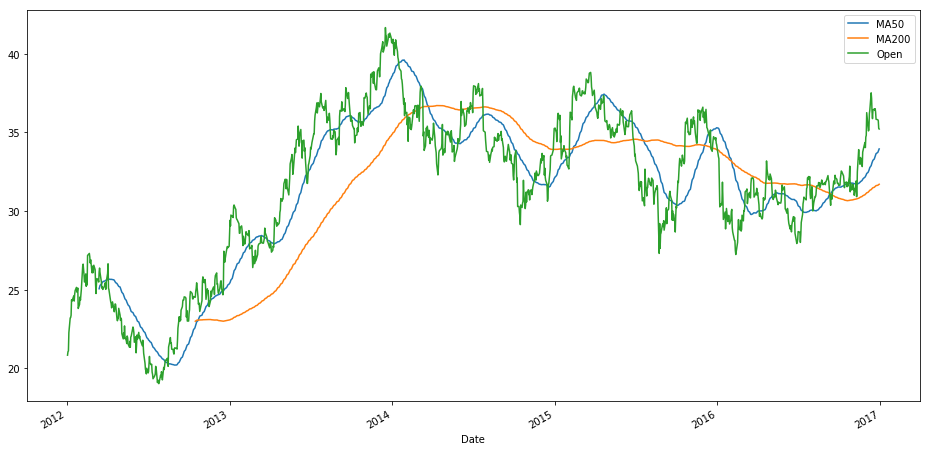

In [23]:
GM['MA50'] = GM['Open'].rolling(50).mean()
GM['MA200'] = GM['Open'].rolling(200).mean()
GM[['MA50','MA200','Open']].plot(figsize=(16,8))



In [24]:
from pandas.plotting import scatter_matrix

In [28]:
car_comp = pd.concat([tesla['Open'],GM['Open'],ford['Open']],axis=1)
car_comp.columns = ['Tesla Open','GM Open','ford Open']

In [29]:
car_comp.head()

,Tesla Open,GM Open,ford Open
Date,,,
2012-01-03,28.940001,20.830000,11.00
2012-01-04,28.209999,21.049999,11.15
2012-01-05,27.760000,21.100000,11.33
2012-01-06,27.200001,22.260000,11.74
2012-01-09,27.000000,23.200001,11.83


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B365EDA9E8>,
      dtype=object)

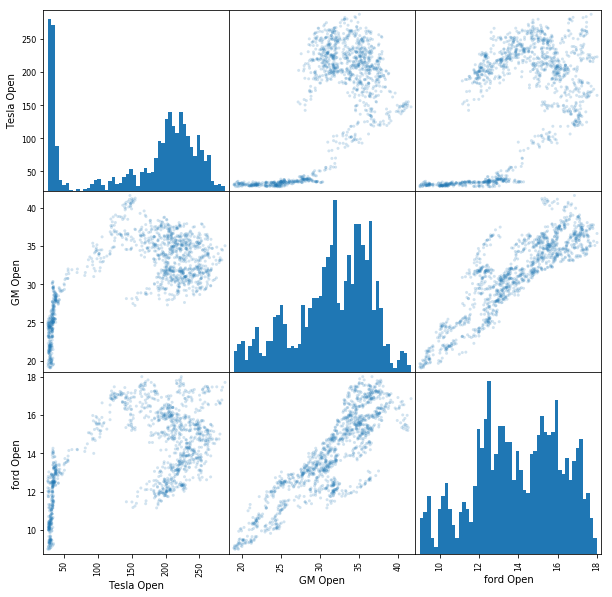

In [31]:
scatter_matrix(car_comp,figsize=(10,10),alpha=0.2,hist_kwds={'bins':50})

In [37]:
from matplotlib.finance import candlestick_ohlc

ModuleNotFoundError: No module named 'matplotlib.finance'

In [41]:
tesla['Returns'] = (tesla['Close']/tesla['Close'].shift(1)) - 1


                                            

In [43]:
tesla['Returns'] = tesla['Close'].pct_change(1)

In [44]:
tesla['Returns']

Date
2012-01-03         NaN
2012-01-04   -0.013177
2012-01-05   -0.021292
2012-01-06   -0.007743
2012-01-09    0.012635
2012-01-10    0.013578
2012-01-11    0.022085
2012-01-12    0.000708
2012-01-13   -0.193274
2012-01-17    0.167179
2012-01-18    0.007895
2012-01-19   -0.001865
2012-01-20   -0.005979
2012-01-23    0.006391
2012-01-24    0.024281
2012-01-25    0.020058
2012-01-26    0.034680
2012-01-27    0.013476
2012-01-30    0.008183
2012-01-31   -0.016909
2012-02-01    0.017544
2012-02-02    0.022650
2012-02-03    0.029752
2012-02-06    0.020867
2012-02-07   -0.006289
2012-02-08    0.010443
2012-02-09    0.020357
2012-02-10   -0.045427
2012-02-13    0.012540
2012-02-14    0.053350
                ...   
2016-11-17    0.025716
2016-11-18   -0.019294
2016-11-21   -0.002702
2016-11-22    0.036039
2016-11-23    0.010305
2016-11-25    0.018173
2016-11-28   -0.002695
2016-11-29   -0.033398
2016-11-30   -0.000897
2016-12-01   -0.039704
2016-12-02   -0.002254
2016-12-05    0.029371
2016-1

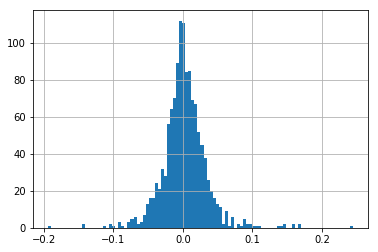

In [45]:
tesla['Returns'].hist(bins=100)

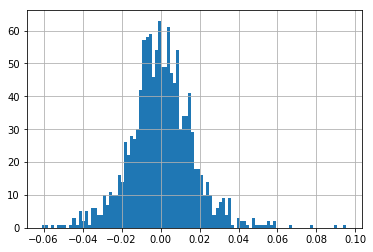

In [46]:
GM['Returns'] = (GM['Close']/GM['Close'].shift(1)) - 1
GM['Returns'] = GM['Close'].pct_change(1)
GM['Returns'].hist(bins=100)


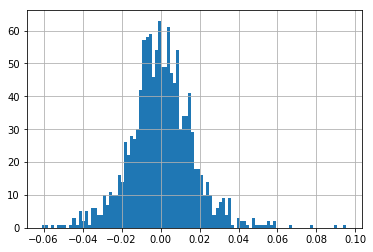

In [47]:
ford['Returns'] = (GM['Close']/GM['Close'].shift(1)) - 1
ford['Returns'] = GM['Close'].pct_change(1)
ford['Returns'].hist(bins=100)

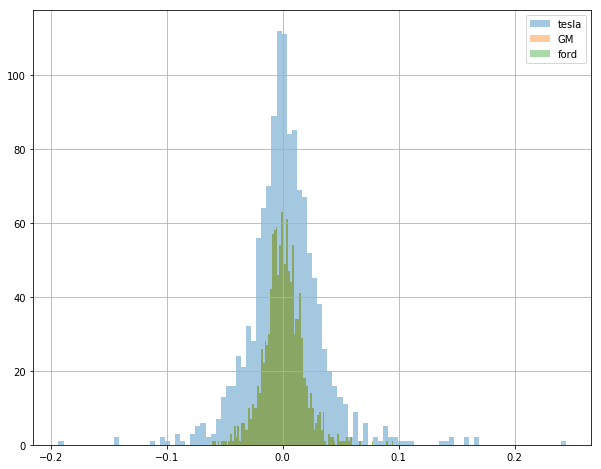

In [48]:
tesla['Returns'].hist(bins=100,label='tesla',figsize=(10,8),alpha=0.4)
GM['Returns'].hist(bins=100,label='GM',figsize=(10,8),alpha=0.4)
ford['Returns'].hist(bins=100,label='ford',figsize=(10,8),alpha=0.4)
plt.legend()